In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# remove the duplicates
df=df.drop_duplicates(subset=['Invoice ID'])

In [6]:
df['Invoice ID'].nunique()

1000

In [7]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# data.drop('Invoice ID',axis=1 , inplace=True)

In [10]:
Num=[]
for col in df.columns:
    if (df[col].dtype==int)or (df[col].dtype==float):
        Num.append(col)
print (Num)

['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


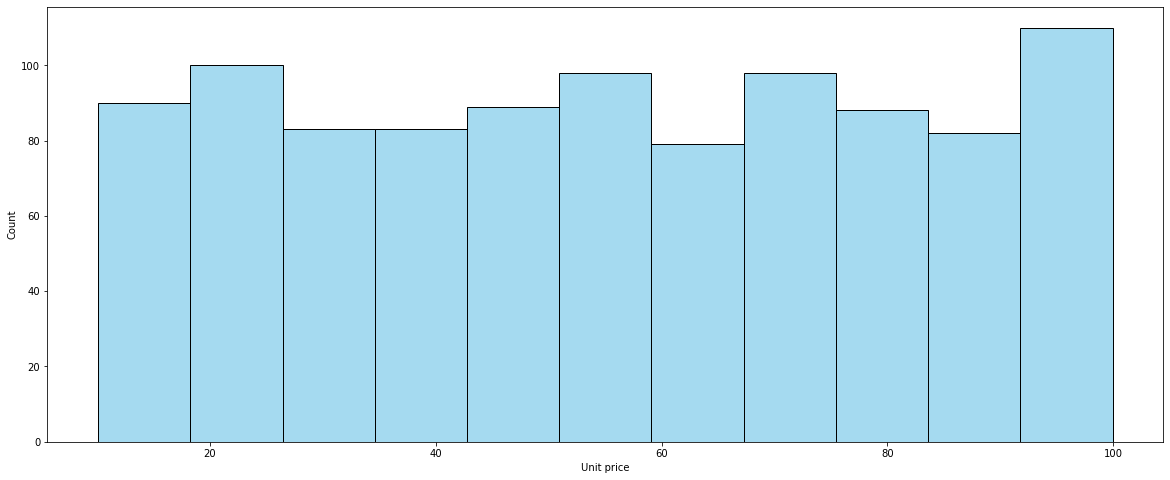

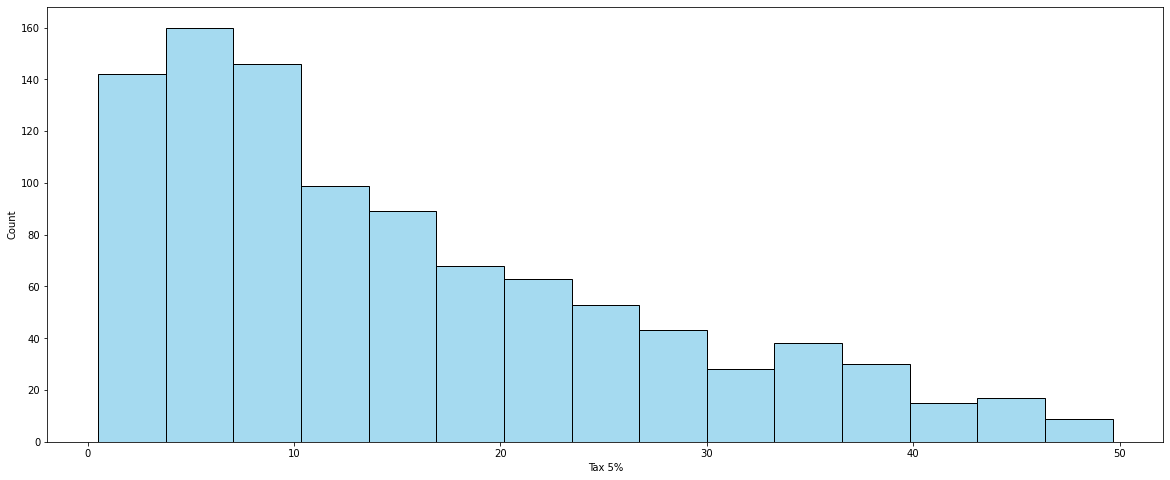

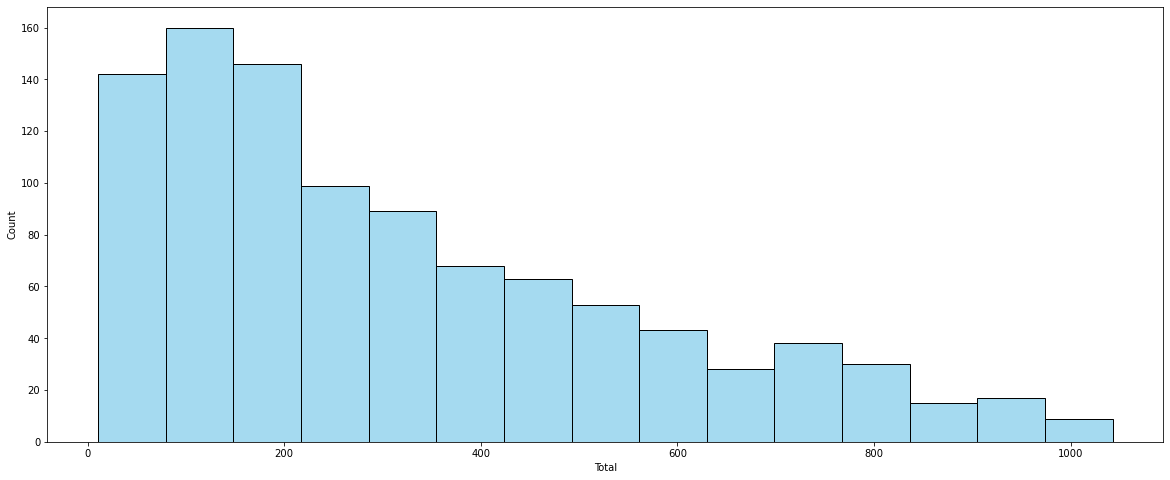

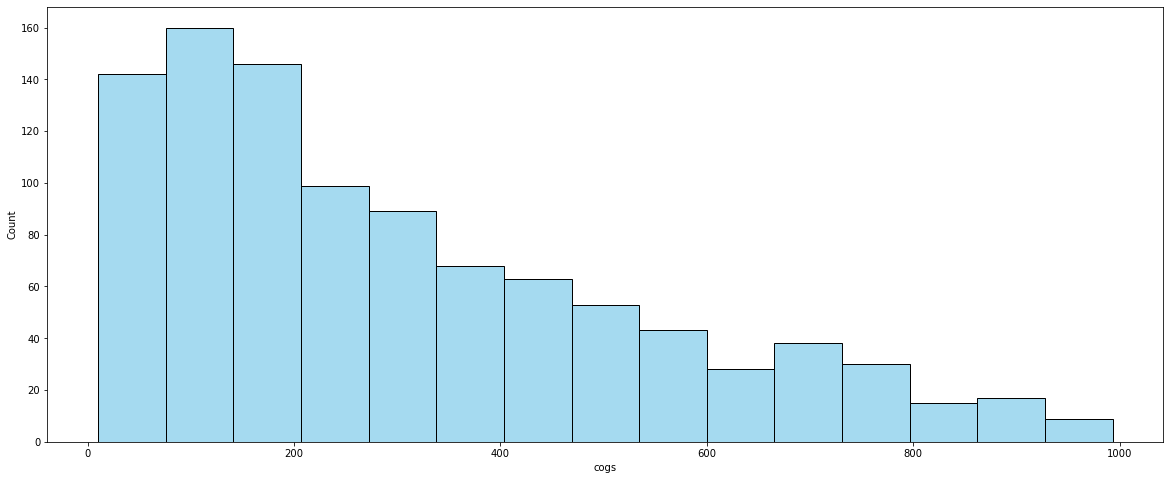

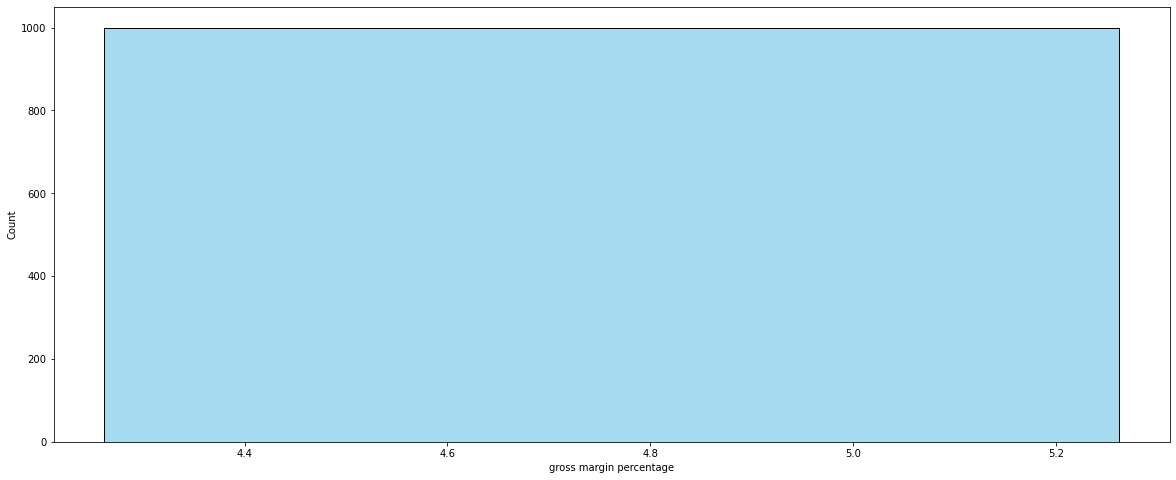

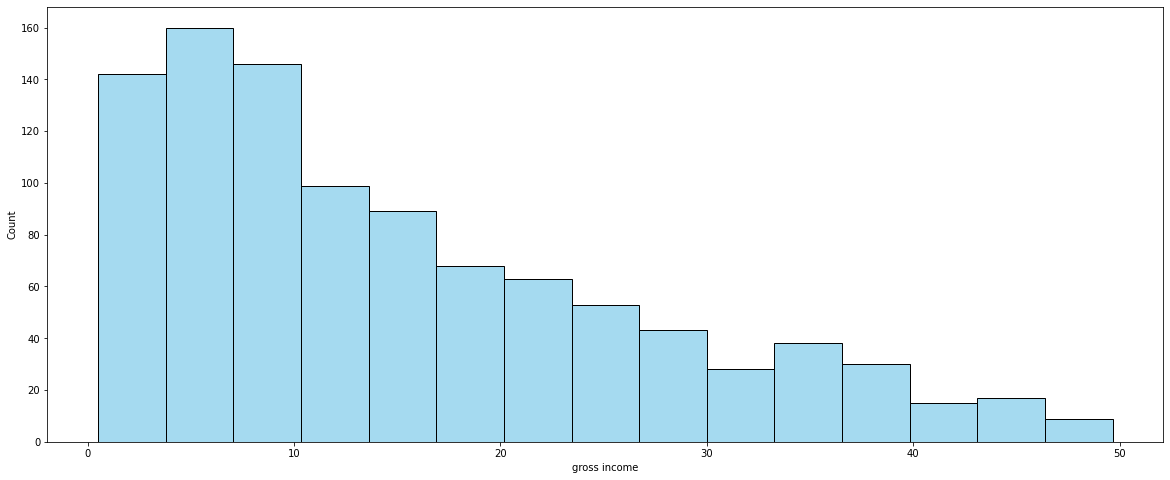

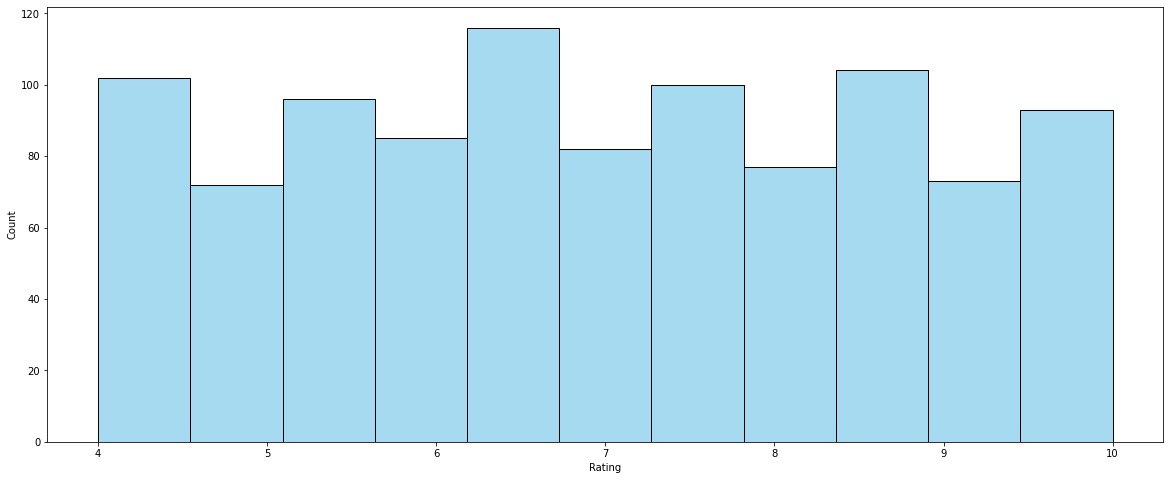

In [11]:
for col in Num:
    plt.figure(figsize=(20,8))
    sns.histplot(df[col], color="skyblue")
    plt.show()

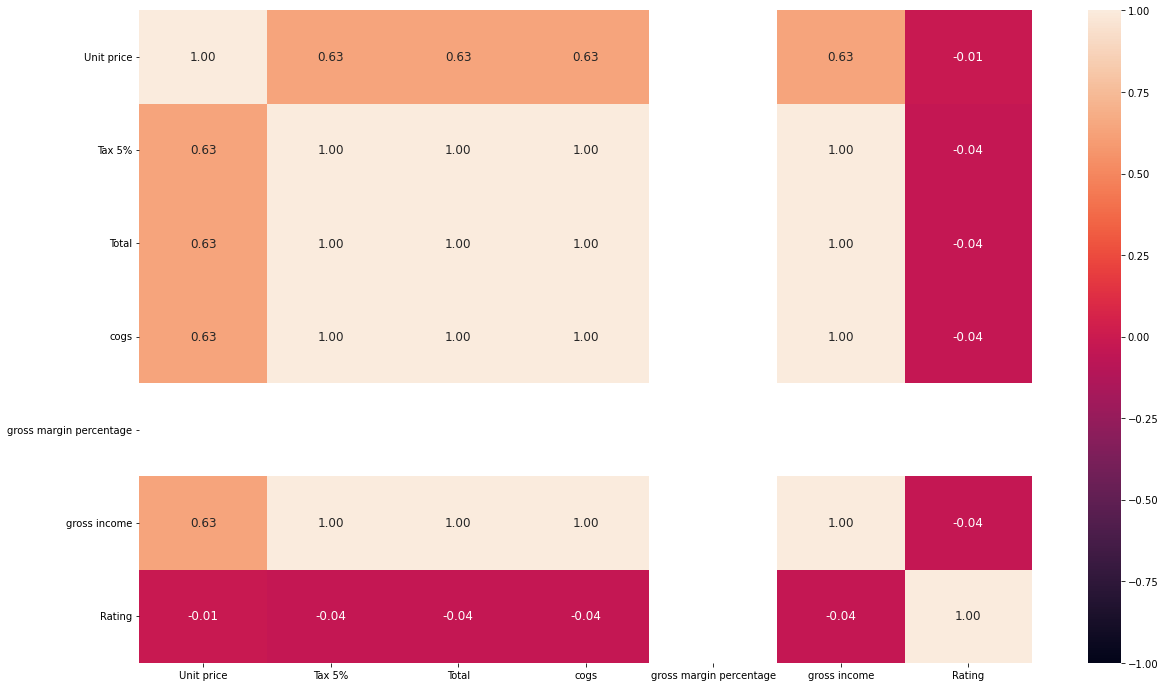

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(df[Num].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

In [13]:
categorical=[]
for col in df.columns:
    if  (df[col].dtype==object):
        categorical.append(col)
print (categorical)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


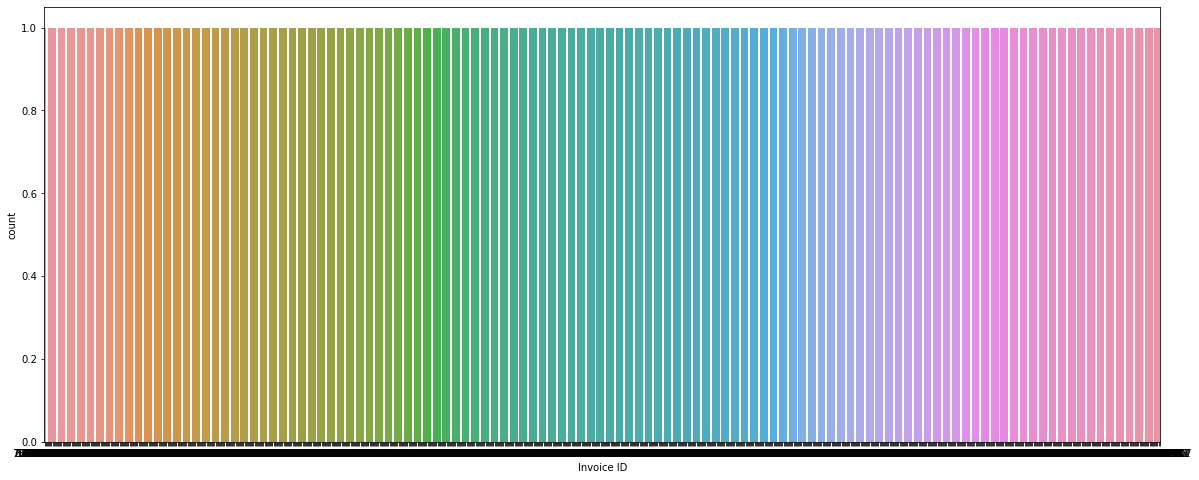

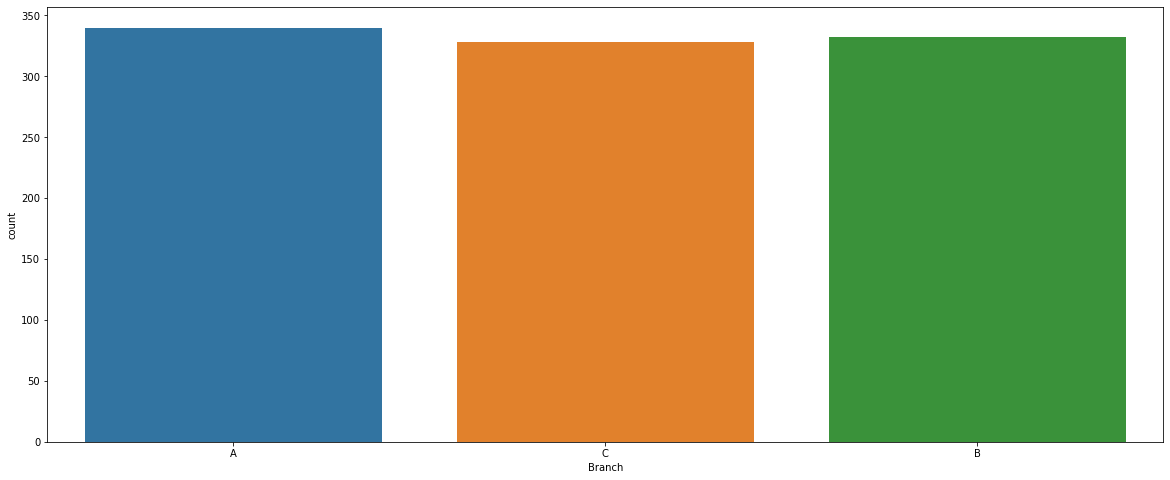

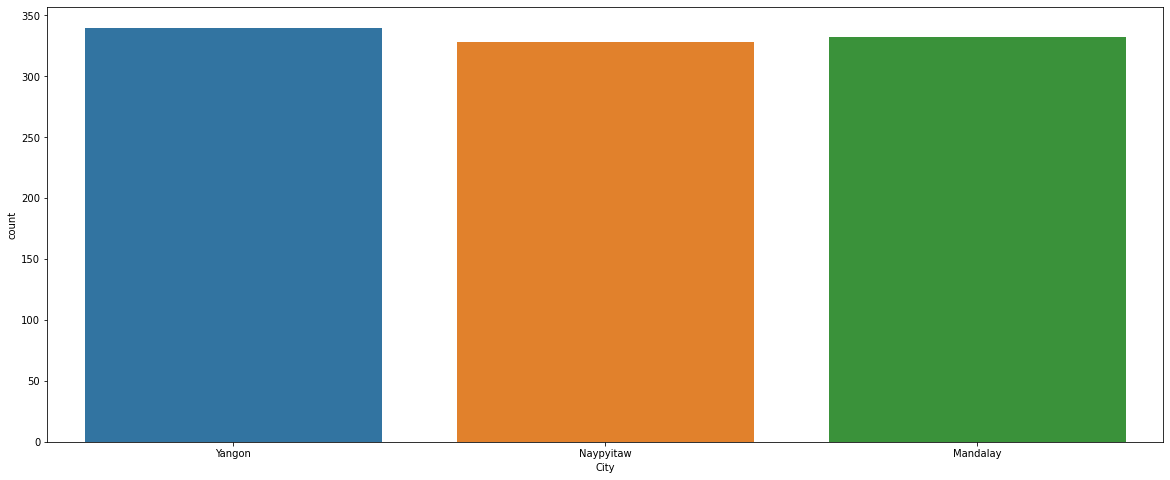

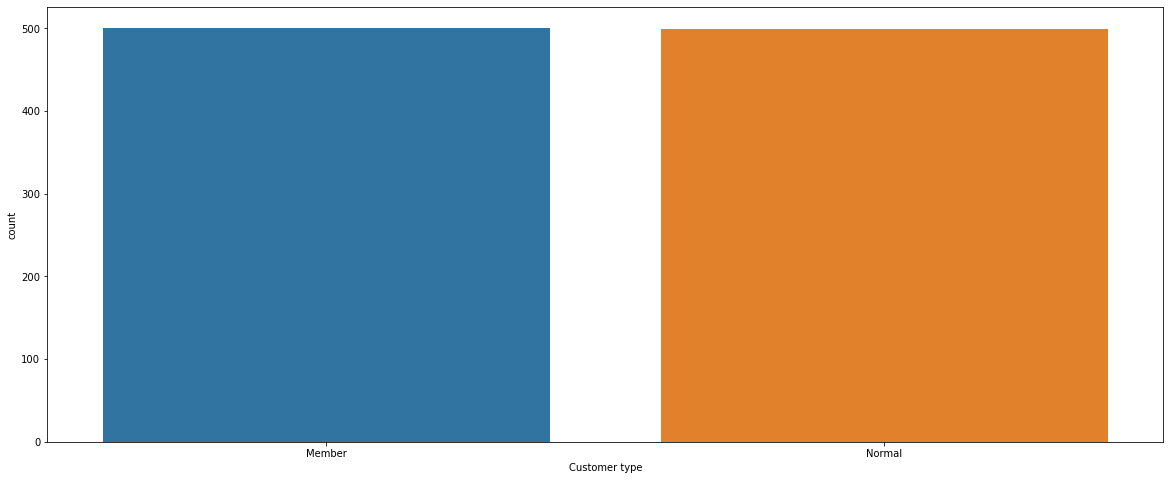

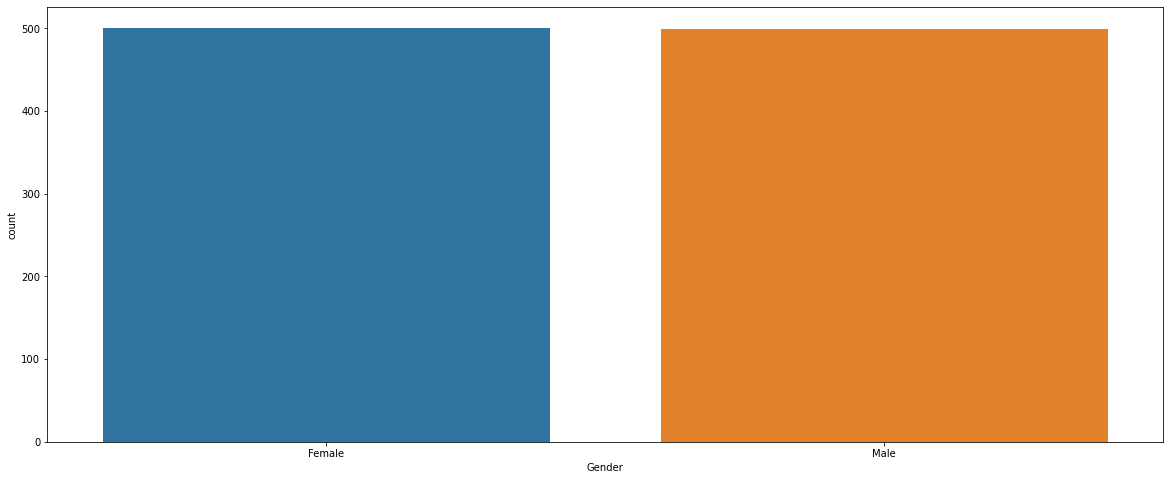

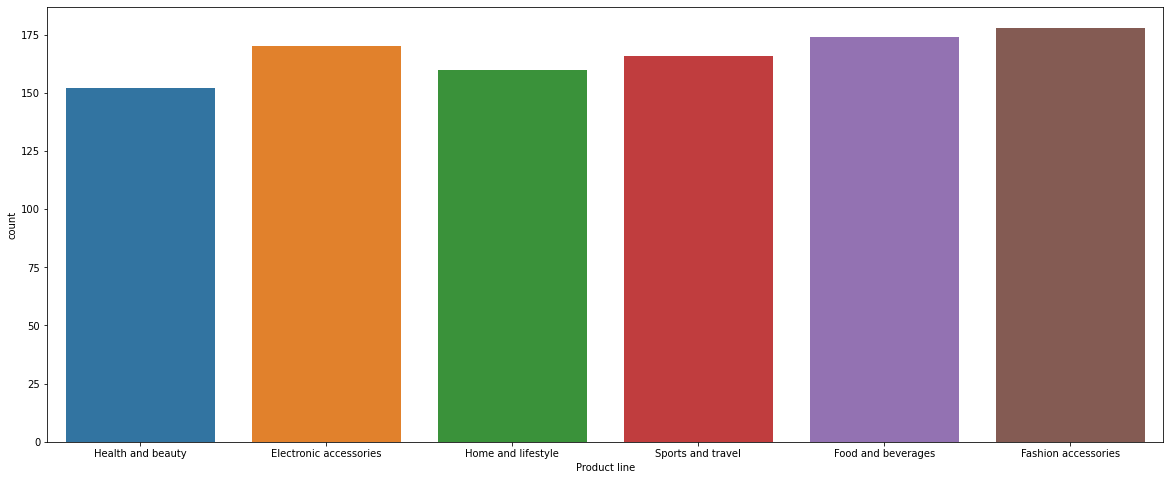

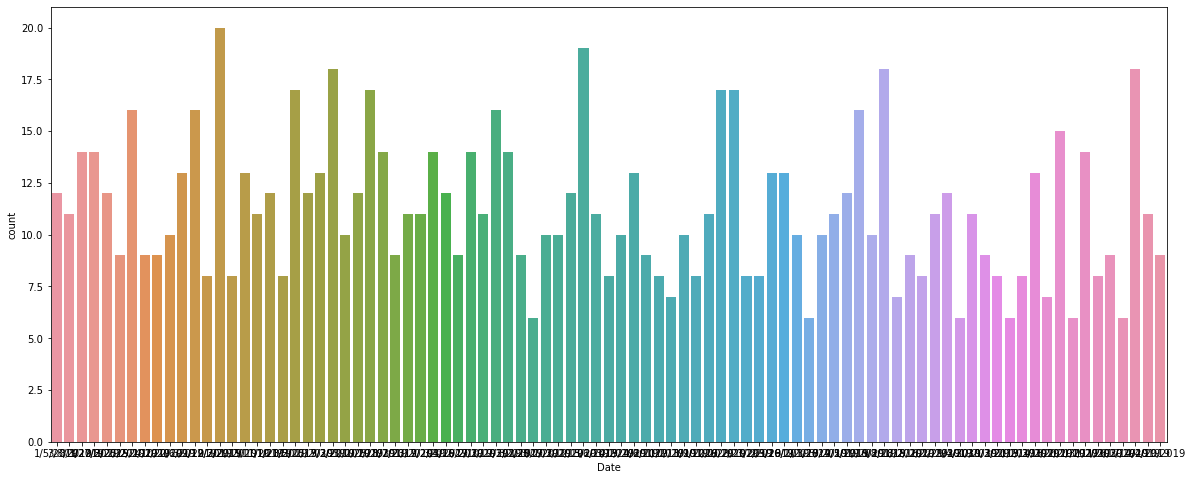

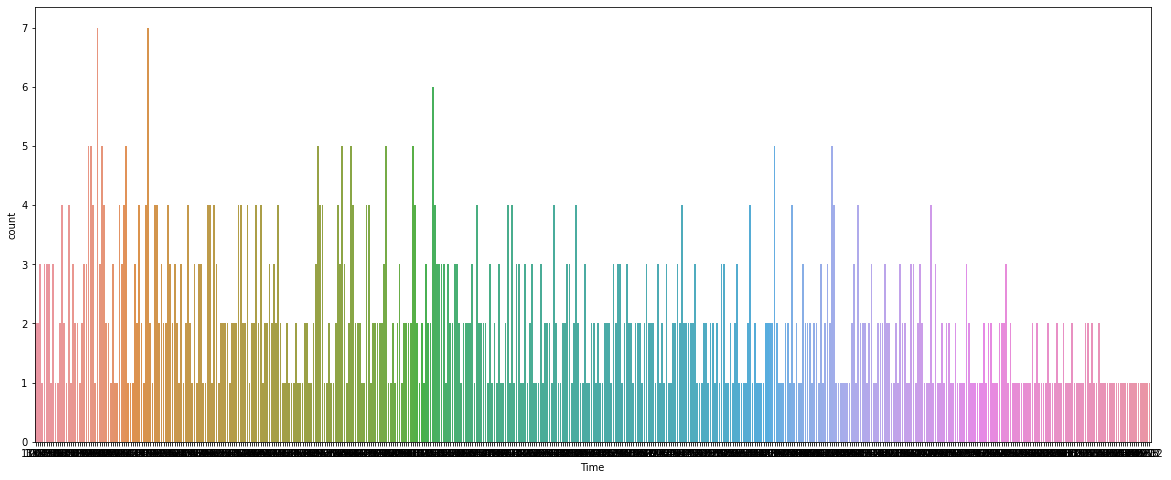

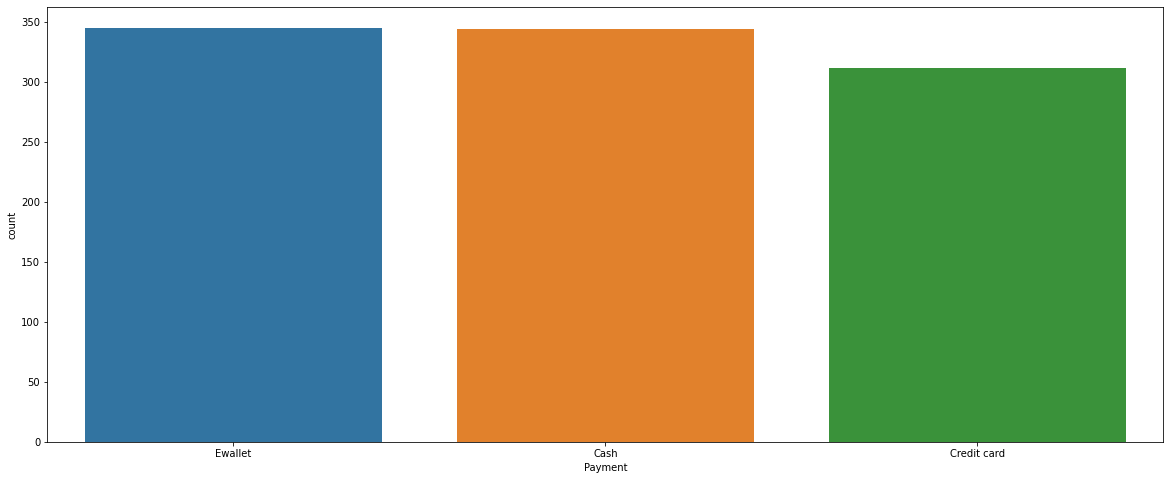

In [14]:
for col in categorical:
    plt.figure(figsize=(20,8))
    sns.countplot(x=df[col])
    plt.show()

In [15]:
# see what the best selling Product line for each branch
print(pd.pivot_table(df, index = 'Product line', columns = 'Branch' ,values = 'gross income' ,aggfunc ='count'))

Branch                   A   B   C
Product line                      
Electronic accessories  60  55  55
Fashion accessories     51  62  65
Food and beverages      58  50  66
Health and beauty       47  53  52
Home and lifestyle      65  50  45
Sports and travel       59  62  45


In [16]:
# the best selling branch
b= df.groupby('Branch')[['gross income']].mean().reset_index()
b

,Branch,gross income
0,A,14.874001
1,B,15.232024
2,C,16.052367


<AxesSubplot:xlabel='Branch', ylabel='gross income'>

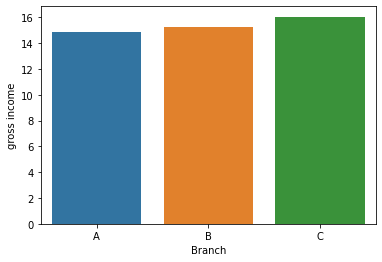

In [17]:
sns.barplot(x='Branch',y='gross income',data=b)

In [18]:
# gross income of different product lines
b=df.groupby('Product line')['gross income'].sum().reset_index()
b

,Product line,gross income
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
2,Food and beverages,2673.5640
3,Health and beauty,2342.5590
4,Home and lifestyle,2564.8530
5,Sports and travel,2624.8965


In [19]:
# most rating branch
b=df.groupby('Branch')[['Rating']].mean().reset_index()
b

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


In [20]:
# which day gross income is most
df['Date']=pd.to_datetime(df['Date'])
df['weekday']=df['Date'].dt.day_name()
w= df.groupby('weekday')[['gross income']].sum().reset_index()
w

,weekday,gross income
0,Friday,2091.7305
1,Monday,1804.7180
2,Saturday,2672.4195
3,Sunday,2117.0425
4,Thursday,2159.4880
5,Tuesday,2451.5355
6,Wednesday,2082.4350


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

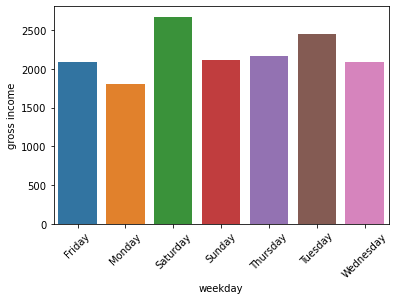

In [21]:
sns.barplot(x='weekday',y='gross income',data=w)
plt.xticks(rotation=45)

In [22]:
sns.barplot(x='Product line',y='gross income',data=b)
plt.xticks(rotation=45)

ValueError: Could not interpret input 'Product line'

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)